# Description

Demonstrate time and memory profiling tools on a toy example.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

import logging
import time

import IPython.display as dspl
import pandas as pd

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/wd/julia/.../etl3/notebooks/utils.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/wd/julia/.conda/envs/develop/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/wd/julia/.conda/envs/develop/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/wd/julia/.conda/envs/develop/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be un

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

# Packages
         python: 3.7.6
       gluonnlp: 0.9.1
        gluonts: 0.5.0
         joblib: 0.15.1
          mxnet: 1.6.0
          numpy: 1.17.5
         pandas: 1.0.3
        pyarrow: 0.17.1
          scipy: 1.4.1
        seaborn: 0.10.1
        sklearn: 0.23.1
    statsmodels: 0.11.1
# Last commits:
  * e432bcc9d Julia    PTask4052: Profile KG release process                          (    4 days ago) Fri Aug 21 02:59:12 2020  (HEAD -> PTask4052_Add_end-to-end_time_and_memory_performance_to_release_process, origin/PTask4052_Add_end-to-end_time_and_memory_performance_to_release_process)
  *   3a495335a Paul     Merge pull request #4120 from .../PTask4108_Create_more_Crude_oil_hypotheses (    4 days ago) Thu Aug 20 18:16:16 2020           
  |\  
  | *   310bed1e6 Paul     Merge branch 'master' into PTask4108_Create_more_Crude_oil_hypotheses (    4 days ago) Thu Aug 20 18:08:23 2020           
  | |\  
  | |/  
  |/|   


# Functions

In [7]:
def func1() -> pd.DataFrame:
    time.sleep(2)
    df = pd.DataFrame(["str1"] * int(1e6))
    return df


def func2(df: pd.DataFrame) -> pd.DataFrame:
    time.sleep(3)
    df[1] = df[0] + "_str2"
    return df


def func3() -> pd.DataFrame:
    time.sleep(1)
    df = func1()
    df = func2(df)
    return df

# Profile time

## Profile overall time

In [12]:
%%time
df = func3()

CPU times: user 105 ms, sys: 35.9 ms, total: 141 ms
Wall time: 6.15 s


## Time by function

The docs do not say that, but under the hood `%prun` uses `cProfile`: https://github.com/ipython/ipython/blob/master/IPython/core/magics/execution.py#L22

In [13]:
# We can suppress output to the notebook by specifying "-q".
%prun -D tmp.pstats df = func3()

 
*** Profile stats marshalled to file 'tmp.pstats'. 


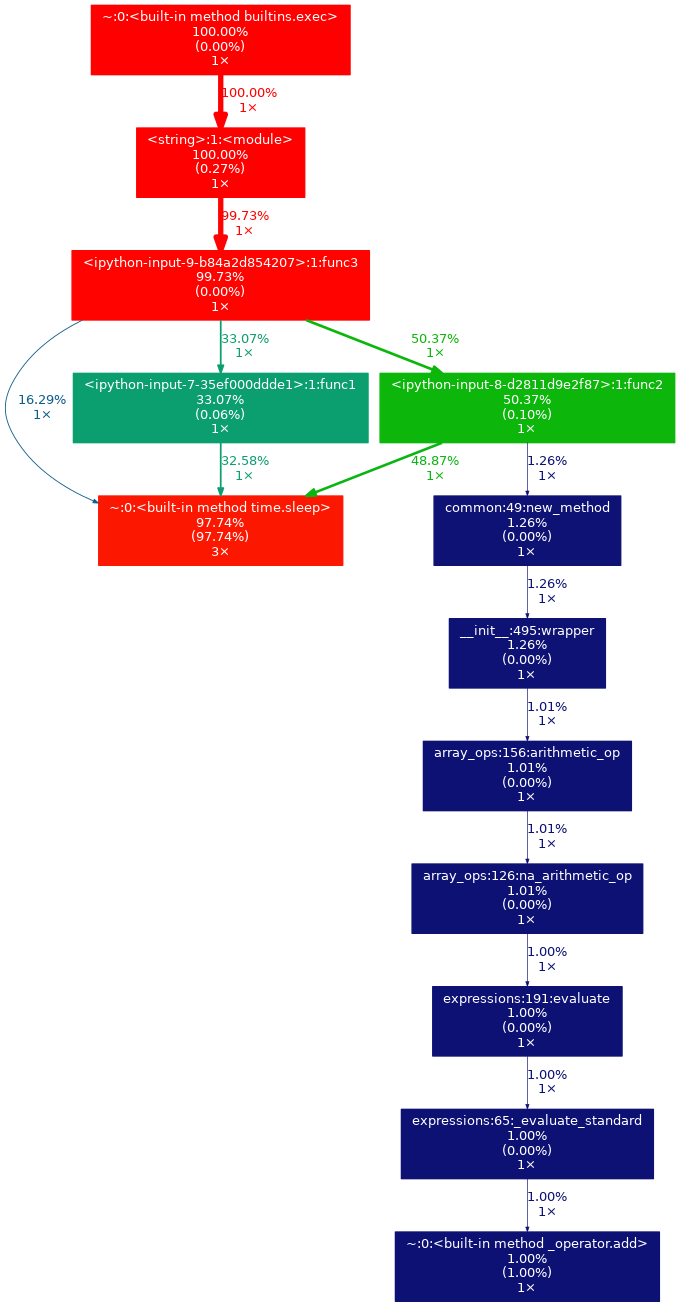

In [14]:
!gprof2dot -f pstats tmp.pstats | dot -Tpng -o output.png
dspl.Image(filename="output.png")

`gprof2dot` supports thresholds that make output more readable: https://github.com/jrfonseca/gprof2dot#documentation

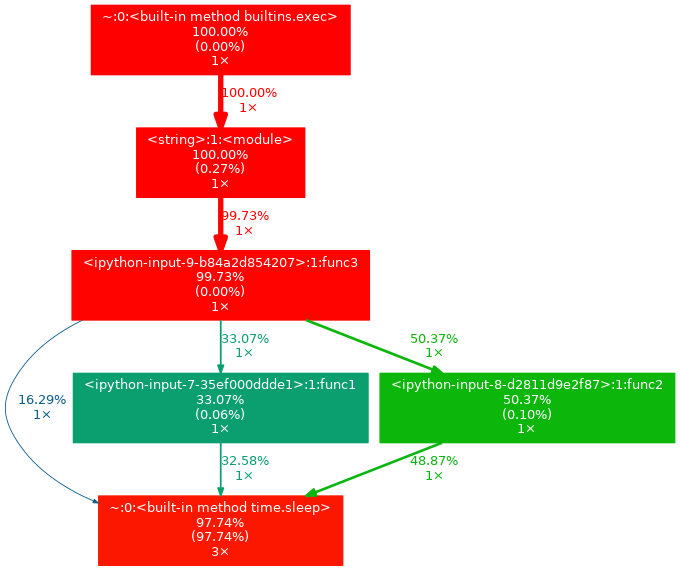

In [25]:
!gprof2dot -n 5 -e 5 -f pstats tmp.pstats | dot -Tpng -o output.png
dspl.Image(filename="output.png")

# Profile memory

## Peak memory

In [11]:
%%memit
df = func3()

peak memory: 661.41 MiB, increment: 77.19 MiB


## Memory by line

The function needs to be defined outside of a notebook to profile it by line, but this is how to execute the profiling:

In [15]:
%mprun -f func3 df = func3()

ERROR: Could not find file <ipython-input-9-b84a2d854207>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.

